In [1]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#data aquistion
titanic_train = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv("titanic_test.csv")

In [4]:
titanic_train.head()
#categorical - Pclass,sex,sibsp,parch,embarked
#numerical - age,fare
#text - name,ticket

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
titanic_train.info()
#age and cabin have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   Ticket       891 non-null    object 
 5   Fare         891 non-null    float64
 6   Cabin        204 non-null    object 
 7   Pclass_2     891 non-null    uint8  
 8   Pclass_3     891 non-null    uint8  
 9   Sex_male     891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
 12  SibSp_1      891 non-null    uint8  
 13  SibSp_2      891 non-null    uint8  
 14  SibSp_3      891 non-null    uint8  
 15  SibSp_4      891 non-null    uint8  
 16  SibSp_5      891 non-null    uint8  
 17  SibSp_8      891 non-null    uint8  
 18  Parch_1      891 non-null    uint8  
 19  Parch_2 

In [6]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

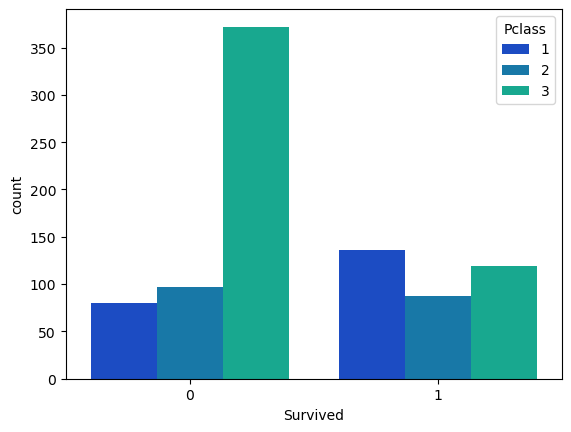

In [30]:
#visualization
#target column relation with other categorical
sns.countplot(x="Survived",hue="Pclass",palette="winter",data=titanic_train)
#many people who didnt survive were from class 3

<Axes: xlabel='Survived', ylabel='count'>

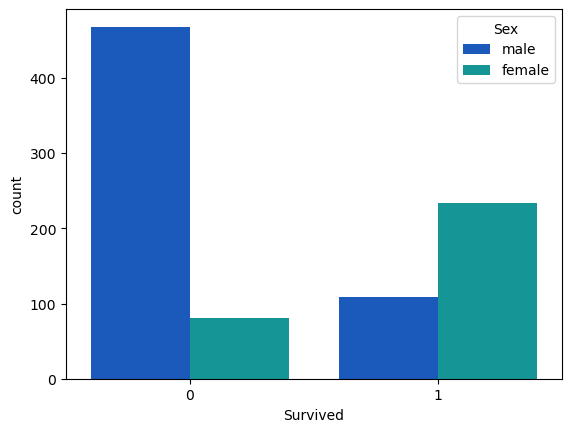

In [32]:
sns.countplot(x="Survived",hue="Sex",palette="winter",data=titanic_train)
#more men than women didnt survive

<Axes: xlabel='Survived', ylabel='count'>

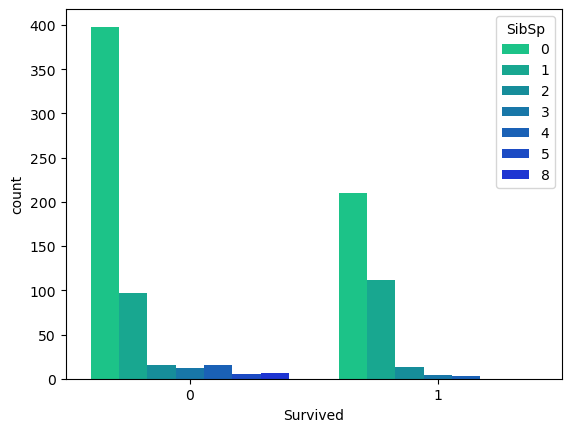

In [37]:
sns.countplot(x="Survived",hue="SibSp",palette="winter_r",data=titanic_train)

<Axes: xlabel='Pclass', ylabel='count'>

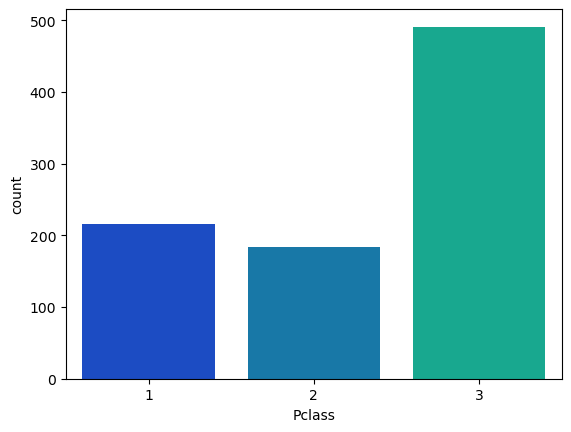

In [40]:
sns.countplot(x="Pclass",data=titanic_train,palette="winter")
#most boarders in class 3

<Axes: xlabel='Sex', ylabel='count'>

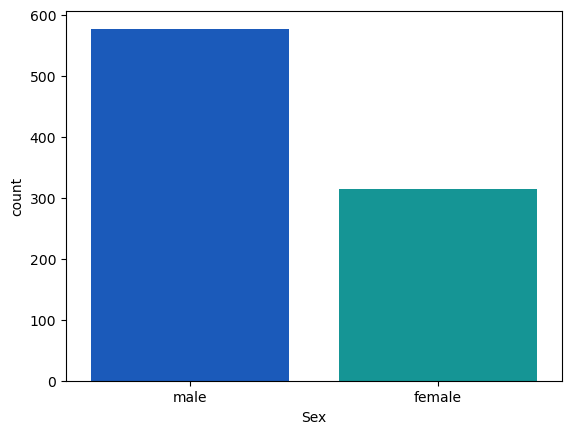

In [41]:
sns.countplot(x="Sex",data=titanic_train,palette="winter")
#more men on-board

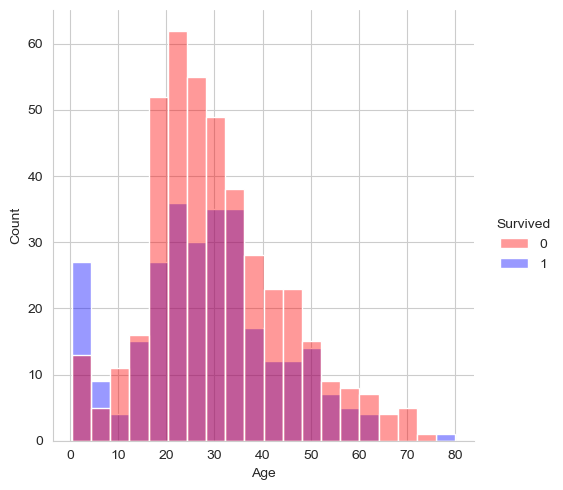

In [53]:
sns.set_style("whitegrid")
sns.displot(x="Age",hue="Survived",data=titanic_train,palette=["red","blue"],alpha=0.4)

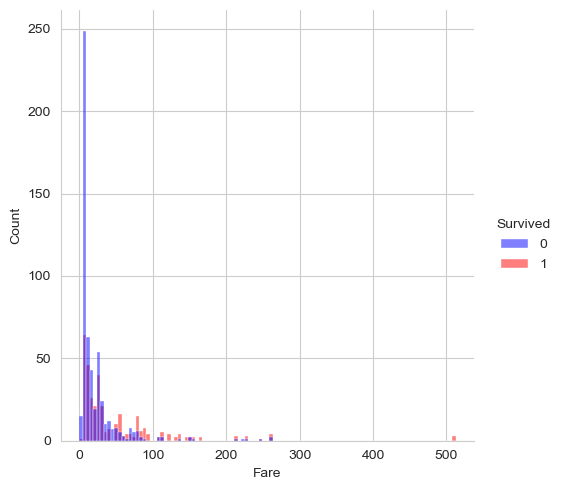

In [54]:
sns.displot(x="Fare",hue="Survived",data=titanic_train,palette=["blue","red"],alpha=0.5)

In [56]:
#mean for age according to class for train
m_age_1 = titanic_train[titanic_train["Pclass"]==1]["Age"].mean()
m_age_2 = titanic_train[titanic_train["Pclass"]==2]["Age"].mean()
m_age_3 = titanic_train[titanic_train["Pclass"]==3]["Age"].mean()

In [57]:
#mean for age according to class for test
m_age_1_t = titanic_test[titanic_test["Pclass"]==1]["Age"].mean()
m_age_2_t = titanic_test[titanic_test["Pclass"]==2]["Age"].mean()
m_age_3_t = titanic_test[titanic_test["Pclass"]==3]["Age"].mean()

In [69]:
#filling null value for train
def impute_age_train(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return m_age_1
        elif Pclass == 2:
            return m_age_2
        else:
            return m_age_3
    else:
        return Age
titanic_train["Age"] = titanic_train[["Age","Pclass"]].apply(impute_age_train,axis=1)

In [71]:
#filling null value for test
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return m_age_1_t
        elif Pclass == 2:
            return m_age_2_t
        else:
            return m_age_3_t
    else:
        return Age
titanic_test["Age"] = titanic_test[["Age","Pclass"]].apply(impute_age_test,axis=1)

In [72]:
#dummy variables for pclass,sex,embarked etc
cat_ft = ["Pclass","Sex","Embarked","SibSp","Parch"]
titanic_train = pd.get_dummies(titanic_train,columns = cat_ft,drop_first=True)

In [76]:
titanic_test = pd.get_dummies(titanic_test,columns = cat_ft,drop_first=True)

In [79]:
titanic_train.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [81]:
titanic_test.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [80]:
titanic_train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,22.0,7.2500,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,38.0,71.2833,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,35.0,53.1000,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,35.0,8.0500,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(titanic_train.drop("Survived",axis=1))
ft = st.transform(titanic_train.drop("Survived",axis=1))
st.fit(titanic_test)
tt = st.transform(titanic_test)

In [118]:
#datasplit
X_train = ft
y_train = titanic_train["Survived"]
X_test = tt

In [119]:
#importing model - decisiontree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [96]:
#training
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [98]:
#testing 
predictions_dtree = dtree.predict(X_test)

In [120]:
#importing model RandomForst
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)

In [121]:
#training
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [122]:
#testing 
predictions_rfc = rfc.predict(X_test)

In [104]:
test_2 = pd.read_csv("titanic_test.csv")

In [109]:
pred_dtree.to_csv("titanic_predictions_dtree.csv")

In [123]:
p_rfc = pd.DataFrame(predictions_rfc,columns=["Survived"])
pred_rfc = pd.concat([p_rfc,test_2["PassengerId"]],axis=1)
pred_rfc.set_index("PassengerId",inplace=True)
pred_rfc.to_csv("titanic_predictions_rfc_3.csv")